In [1]:
from matplotlib import pyplot as plt
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math

In [13]:
evt_x = np.loadtxt("data/fit-data-2.txt")

In [14]:
evt_x.max()

149.7298077995585

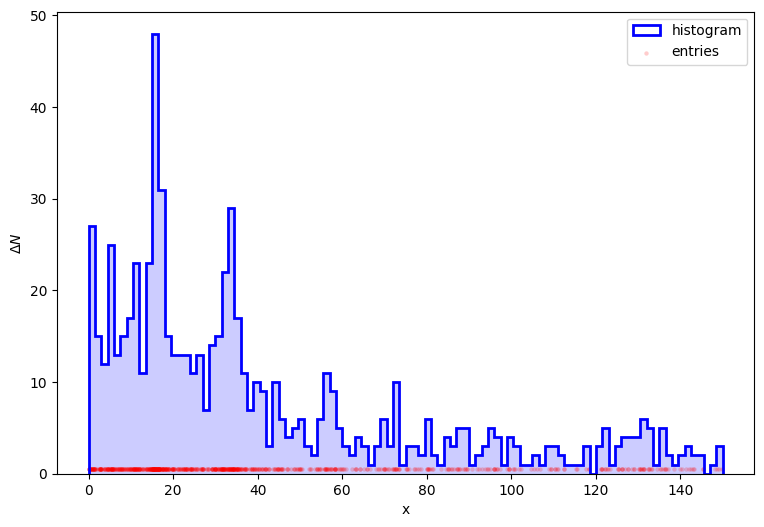

In [15]:
fig, ax = plt.subplots(figsize=(9,6),dpi=100)
n_bins = 100
x_range = (0, 150)
data_y, bins, patches = ax.hist(evt_x, n_bins, range=x_range, density=False, 
    histtype=u'step', edgecolor='b', linewidth=2, label='histogram')
ax.hist(evt_x, n_bins, range=x_range, density=False, color='b', alpha=0.2)
ax.scatter(evt_x, np.full_like(evt_x, 0.5), marker='o', color='r', s=10, alpha=0.2, linewidth=0, label='entries')
plt.xlabel('x')
plt.ylabel('$\Delta N$')
plt.legend()
plt.show()

In [16]:
#bins

In [17]:
data_x = (bins+(bins[1]-bins[0])/2)[:-1]
#print(data_x)
delta_x = bins[1]-bins[0]
print("𝚫x = {:.2f}".format(delta_x))

𝚫x = 1.50


In [18]:
data_yerr = np.sqrt(data_y)
#print(data_y)
#print(data_yerr)

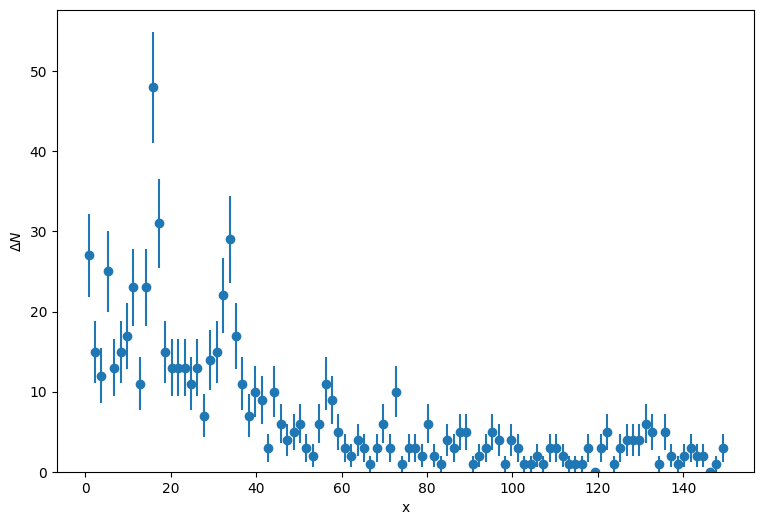

In [19]:
plt.figure(figsize=(9,6),dpi=100)
plt.errorbar(data_x, data_y, data_yerr, fmt="o")
plt.xlabel('x')
plt.ylabel('$\Delta N$')
plt.ylim(0)
plt.show()

In [29]:
def bkg_pdf(x, l):
    return np.exp(-x/l)/l
def sig_pdf(x, mu, sigma):
    return np.exp(-((x - mu)/sigma)**2/2)/math.sqrt(2*math.pi*sigma**2)
def bkg_model(x, b, l):
    return b*bkg_pdf(x, l)
def sig_model(x, s, mu, sigma):
    return s*sig_pdf(x, mu, sigma)
def fit_model(x, b, l, s1, mu1, sigma1, s2, mu2, sigma2):
    return bkg_model(x, b, l)+sig_model(x, s1, mu1, sigma1)+sig_model(x, s2, mu2, sigma2)

In [30]:
least_squares_mode = LeastSquares(data_x[data_y>0], data_y[data_y>0], data_yerr[data_y>0], fit_model)
m = Minuit(least_squares_mode, *(250,10,60,10,1.5,60,35,1.0), name=("B", "$\lambda$", "S1", "$\mu_1$", "$\sigma_1$", "S2", "$\mu_2$", "$\sigma_2$"))
#m.fixed["$\sigma_2$"]=True
#m.fixed["S2"]=True

In [31]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 112.5 (χ²/ndof = 1.2)      │              Nfcn = 517              │
│ EDM = 3.58e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name       │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ B          │    740    │    40     │            │            │         │         │       │
│ 1 │ $\lambda$  │   42.2    │    3.2    │            │            │         │         │       │
│ 2 │ S1         │    102    │    17     │            │            │         │         │       │
│ 3 │ $\mu_1$    │   16.03   │   0.20    │            │            │         │         │       │
│ 4 │ $\sigma_1$ │   1.12    │   0.19    │            │            │         │         │       │
│ 5 │ S2         │    85     │    17     │            │            │         │         │       │
│ 6 │ $\mu_2$    │   33.3    │    0.4    │            │            │         │         │       │
│ 7 │ $\sigma_2$ │    1.8    │    0.4    │            │            │         │         │       │
└───┴────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────────┬─────────────────────────────────────────────────────────────────────────────────────────┐
│            │          B  $\lambda$         S1    $\mu_1$ $\sigma_1$         S2    $\mu_2$ $\sigma_2$ │
├────────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│          B │   1.49e+03          5    -0.14e3      -0.09      -1.26    -0.17e3       0.65      -3.35 │
│  $\lambda$ │          5       10.3         11      -0.00       0.09          4      -0.05       0.08 │
│         S1 │    -0.14e3         11        292       0.07       1.21     0.02e3      -0.12       0.43 │
│    $\mu_1$ │      -0.09      -0.00       0.07     0.0421       0.01       0.01      -0.00       0.00 │
│ $\sigma_1$ │      -1.26       0.09       1.21       0.01     0.0373       0.19      -0.00       0.00 │
│         S2 │    -0.17e3          4     0.02e3       0.01       0.19        277      -0.60       2.97 │
│    $\mu_2$ │       0.65      -0.05      -0.12      -0.00      -0.00      -0.60      0.156      -0.03 │
│ $\sigma_2$ │      -3.35       0.08       0.43       0.00       0.00       2.97      -0.03      0.179 │
└────────────┴─────────────────────────────────────────────────────────────────────────────────────────┘

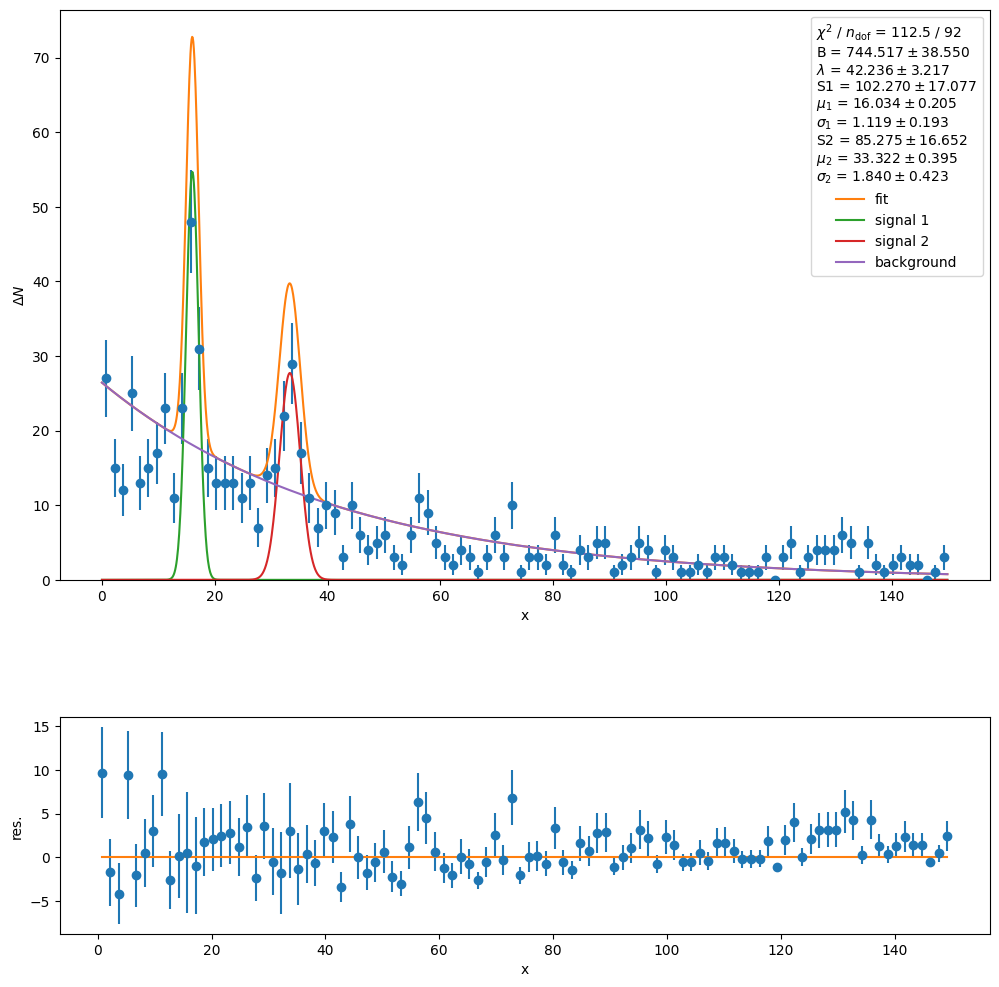

In [34]:
import matplotlib.gridspec as gridspec
data_x_f = np.arange(0, bins[-1], 0.1)
data_y_f = fit_model(data_x_f, *m.values)*delta_x
bkg_y_f = bkg_model(data_x_f, *m.values[0:2])*delta_x
sig1_y_f = sig_model(data_x_f, *m.values[2:5])*delta_x
sig2_y_f = sig_model(data_x_f, *m.values[5:])*delta_x

plt.figure(figsize=(12,12),dpi=100)
gs = gridspec.GridSpec(8, 1)
ax0 = plt.subplot(gs[:5, :])
ax1 = plt.subplot(gs[6:, :])
ax0.errorbar(data_x, data_y, data_yerr, fmt="o")
ax0.plot(data_x_f, data_y_f, label="fit")
ax0.plot(data_x_f, sig1_y_f, label="signal 1")
ax0.plot(data_x_f, sig2_y_f, label="signal 2")
ax0.plot(data_x_f, bkg_y_f, label="background")
ax.legend()
ax0.set_xlabel('x')
ax0.set_ylabel('$\Delta N$')
ax1.errorbar(data_x, (data_y-fit_model(data_x, *m.values)), data_yerr, fmt="o")
ax1.plot([data_x[0],data_x[-1]], [0,0])
ax1.set_xlabel('x')
ax1.set_ylabel('res.')
ax0.set_ylim(0)

fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_x) - m.nfit}" ]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
ax0.legend(title="\n".join(fit_info))
plt.show()
plt.show()